In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\accre-pumpkin-pie


In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
jobs = pd.read_csv("data/fullsample.csv")
jobs.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
#"%Y/%m/%d %H:%M:%S"

In [6]:
jobs_filtered = jobs[(jobs['STATE'] == 'COMPLETED') | (jobs['STATE'] == 'FAILED')].copy()

In [7]:
jobs_filtered['END'] = jobs_filtered['END'].str.replace('T', ' ')
jobs_filtered['END'] = pd.to_datetime(jobs_filtered['END'], format = "%Y-%m-%d %H:%M:%S")
jobs_filtered.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0


In [8]:
user_ninety_two_oh_four_failures = pd.read_csv('data/final_log_csv.csv')
user_ninety_two_oh_four_failures['DateTime'] = pd.to_datetime(user_ninety_two_oh_four_failures['Date'] + ' ' + user_ninety_two_oh_four_failures['Time'])
user_ninety_two_oh_four_failures = user_ninety_two_oh_four_failures.drop(columns = 'Unnamed: 0')
user_ninety_two_oh_four_failures

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
0,2020-10-18,06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:16:25
1,2020-10-18,06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:38:44
2,2020-10-18,06:53:44,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:53:44
3,2020-10-18,06:54:04,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:54:04
4,2020-10-18,07:47:25,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 07:47:25
...,...,...,...,...,...,...,...,...,...
3291,2021-09-24,18:14:35,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 18:14:35
3292,2021-09-24,19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 19:13:14
3293,2021-10-02,08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 08:14:16
3294,2021-10-02,18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 18:29:08


In [152]:
user_ninety_two_oh_four_failures['Date'].value_counts()

Date
2020-12-04    145
2020-12-02    108
2020-12-09    102
2021-01-01     92
2020-12-05     79
             ... 
2021-03-02      1
2021-08-20      1
2021-08-21      1
2020-11-13      1
2021-10-06      1
Name: count, Length: 235, dtype: int64

In [160]:
sns.histplot(date = user_ninety_two_oh_four_failures['Date'], x='Date', y='')

ValueError: Could not interpret value `Date` for `x`. Value is a string, but `data` was not passed.

In [ ]:
user_ninety_two_oh_four_failures['DateTime']

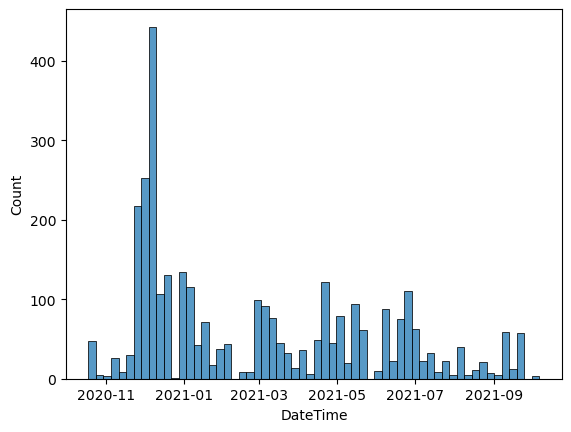

In [9]:
sns.histplot(data =user_ninety_two_oh_four_failures, x='DateTime', bins=60)
plt.show()

In [10]:
user_date_high = pd.to_datetime('2020-12-04').date()
user_high_failure_day_df = user_ninety_two_oh_four_failures[user_ninety_two_oh_four_failures['DateTime'].dt.date == user_date_high]

In [11]:
user_high_failure_day_df.head(2)

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
589,2020-12-04,10:00:34,user 9204,retry 0,20.045381,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-12-04 10:00:34
590,2020-12-04,10:22:23,user 9204,retry 0,20.021241,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-12-04 10:22:23


In [12]:
time_something = user_high_failure_day_df['Time'].value_counts().index[0]

In [13]:
something_df = user_high_failure_day_df[user_high_failure_day_df['Time'] == time_something]

In [14]:
something_df

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
599,2020-12-04,10:52:19,user 9204,retry 2,20.424641,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-12-04 10:52:19
600,2020-12-04,10:52:19,user 9204,retry 0,20.036723,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-12-04 10:52:19


## Filter Logs by high failure interval

<h5>Based on Week</h5>

In [17]:
# High failures seen for 9204 between 2020-12-02 and 2021-01-01
start_date_high = pd.to_datetime('2020-12-02').date()
end_time_high = pd.to_datetime('2020-12-09').date()

high_failures_df = jobs_filtered[(jobs_filtered['END'].dt.date >= start_date_high) & (jobs_filtered['END'].dt.date <= end_time_high)].reset_index(drop=True)

<h5>Based on Day</h5>

In [19]:
date_high = pd.to_datetime('2020-12-04').date()
high_failures_day_df = jobs_filtered[jobs_filtered['END'].dt.date == date_high]

<h5>Based on Time Frame</h5>

In [21]:
start_time_high_fail = pd.to_datetime('2020-12-04 10:40:19')
end_time_high_fail = pd.to_datetime('2020-12-04 10:52:19')

high_failure_timeframe_df = jobs_filtered[(jobs_filtered['END'] >= start_time_high_fail) & (jobs_filtered['END'] <= end_time_high_fail)].reset_index(drop=True)

## Filter Logs by low failure interval

<h5>Based on Week</h5>

In [24]:
start_date_low = pd.to_datetime('2021-08-21').date()
end_time_low = pd.to_datetime('2021-08-28').date()

low_failures_df = jobs_filtered[(jobs_filtered['END'].dt.date >= start_date_low) & (jobs_filtered['END'].dt.date <= end_time_low)].reset_index(drop=True)

<h5>Based on Day</h5>

In [26]:
date_low = pd.to_datetime('2021-03-23').date()
low_failures_day_df = jobs_filtered[jobs_filtered['END'].dt.date == date_low]

<h5>Based on Time Frame</h5>

In [28]:
start_time_low_fail = pd.to_datetime('2021-03-23 10:40:19')
end_time_low_fail = pd.to_datetime('2021-03-23 10:52:19')

low_failure_timeframe_df = jobs_filtered[(jobs_filtered['END'] >= start_time_low_fail) & (jobs_filtered['END'] <= end_time_low_fail)].reset_index(drop=True)

<h1>EDA

In [30]:
display(high_failures_df.shape)
display(low_failures_df.shape)

(140244, 12)

(256113, 12)

In [31]:
display(high_failures_day_df.shape)
display(low_failures_day_df.shape)

(17542, 12)

(19938, 12)

Investigate time area around 10:52:19 on 2020-12-04 and 2021-03-23

In [33]:
display(high_failure_timeframe_df.shape)
display(low_failure_timeframe_df.shape)

(64, 12)

(187, 12)

<h3>Typical Count of Jobs By Hour Dataframe

In [35]:
jobs_filtered.head(2)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0


In [36]:
jobs_filtered['USEDMEM'] = jobs_filtered['USEDMEM'].str.replace('M','').astype(float)

In [162]:
typical_day_count = jobs_filtered.groupby([jobs_filtered['END'].dt.date, jobs_filtered['END'].dt.hour]).agg({'JOBID':'count'})
typical_day_count.index.names = ['Date', 'Hour']

In [164]:
typical_day_count.describe()

,JOBID
count,8922.000000
mean,827.039901
std,1187.305298
min,2.000000
25%,250.000000
50%,487.500000
75%,907.750000
max,13346.000000


In [166]:
typical_day_count.shape

(8922, 1)

In [168]:
typical_day_count.head()

JOBID
Date       Hour       
2020-10-01 0       421
           1      1080
           2      1137
           3      1018
           4      1244

<Axes: xlabel='JOBID', ylabel='Count'>

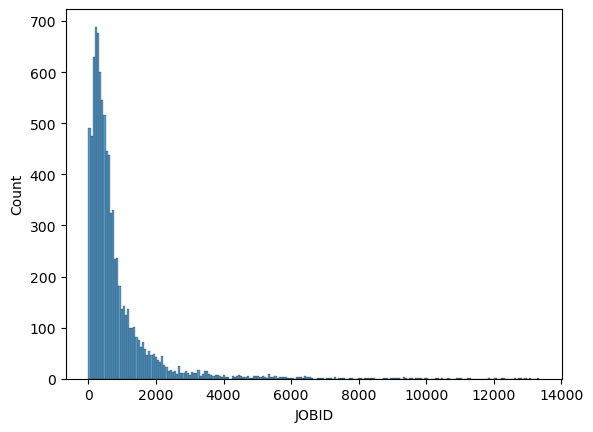

In [170]:
sns.histplot(data = typical_day_count, x='JOBID')

In [172]:
typical_day_count.head(2)

JOBID
Date       Hour       
2020-10-01 0       421
           1      1080

In [174]:
user_ninety_two_oh_four_failures.head(2)

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
0,2020-10-18,06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:16:25
1,2020-10-18,06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:38:44


## 9204 User Failures by typical failures

In [191]:
typical_day_count_user = user_ninety_two_oh_four_failures.groupby([user_ninety_two_oh_four_failures['DateTime'].dt.date, user_ninety_two_oh_four_failures['DateTime'].dt.hour])['User'].size()
typical_day_count_user.index.names = ['Date', 'Hour']

In [213]:
typical_day_count_user.head()
typical_day_vs_userfailures = pd.merge(typical_day_count,typical_day_count_user , left_index=True,right_index=True, how = 'outer')

In [215]:
typical_day_vs_userfailures.head(2)

JOBID  User
Date       Hour              
2020-10-01 0      421.0   NaN
           1     1080.0   NaN

In [217]:
typical_day_vs_userfailures['JOBID'].corr(typical_day_vs_userfailures['User'])

-0.12062456262219788

In [203]:
typical_day_vs_userfailures.loc[datetime.date(2020,12,4)].reset_index().to_csv('C:/Users/Gubbz/Documents/NSS/NSS_Projects/accre-pumpkin-pie/data/TypicalDayFailures.csv')

<h3>Created Dataframe Based on Pass or Fail by Date/Hour</h3>

In [184]:
typical_day_vs_userfailures['fail_or_not'] = typical_day_vs_userfailures['User'].apply(lambda x: 1 if x > 0 else 0)

In [186]:
typical_day_vs_userfailures.head(2)

JOBID  User  fail_or_not
Date       Hour                           
2020-10-01 0      421.0   NaN            0
           1     1080.0   NaN            0

<h5>Looking at specific dates</h5>

In [189]:
typical_day_vs_userfailures.loc[datetime.date(2020,12,4)]

,JOBID,User,fail_or_not
Hour,,,
0,1876.0,NaN,0
1,1676.0,NaN,0
2,722.0,NaN,0
3,308.0,NaN,0
4,1431.0,NaN,0
5,278.0,NaN,0
6,292.0,NaN,0
7,535.0,NaN,0
8,586.0,NaN,0


In [53]:
typical_day_vs_userfailures.loc[datetime.date(2021,3,23)]

,JOBID,USEDMEM,User,fail_or_not
Hour,,,,
0,833.0,5493.276399,NaN,0
1,1781.0,2041.375879,NaN,0
2,555.0,6091.981712,NaN,0
3,525.0,6351.063505,NaN,0
4,862.0,2946.146833,NaN,0
5,1092.0,3146.503846,NaN,0
6,1766.0,3067.903771,NaN,0
7,634.0,9963.871893,NaN,0
8,563.0,12824.441314,NaN,0


In [54]:
typical_day_vs_userfailures.describe()

,JOBID,USEDMEM,User,fail_or_not
count,8922.000000,8922.000000,1348.000000,8924.000000
mean,827.039901,4388.928793,2.445104,0.151053
std,1187.305298,4743.361533,2.460518,0.358121
min,2.000000,0.022500,1.000000,0.000000
25%,250.000000,1788.929118,1.000000,0.000000
50%,487.500000,3186.458832,1.000000,0.000000
75%,907.750000,5323.608134,3.000000,0.000000
max,13346.000000,125438.190000,24.000000,1.000000


In [55]:
typical_day_vs_userfailures.shape

(8924, 4)

In [56]:
typical_day_vs_userfailures

JOBID     USEDMEM  User  fail_or_not
Date       Hour                                       
2020-10-01 0      421.0   19.167886   NaN            0
           1     1080.0   13.272481   NaN            0
           2     1137.0   14.093026   NaN            0
           3     1018.0   14.400530   NaN            0
           4     1244.0  307.038947   NaN            0
...                 ...         ...   ...          ...
2021-10-07 16       8.0  190.727500   NaN            0
           17       8.0   87.610000   NaN            0
           18       8.0  103.357500   NaN            0
           19       8.0   42.953750   NaN            0
           20       6.0   65.586667   NaN            0

[8924 rows x 4 columns]

## Other Misc Work

In [58]:
display(high_failures_df['END'].value_counts().nunique())
display(low_failures_df['END'].value_counts().nunique())

62

58

In [59]:
jobs_by_month = jobs_filtered.groupby(jobs_filtered['END'].dt.month)['JOBID'].count().reset_index()

In [60]:
jobs_by_month

,END,JOBID
0,1,465619
1,2,512598
2,3,623894
3,4,480467
4,5,408939
5,6,623428
6,7,557752
7,8,1182262
8,9,893915
9,10,784598


In [61]:
jobs_by_month.describe()

,END,JOBID
count,12.000000,1.200000e+01
mean,6.500000,6.149042e+05
std,3.605551,2.337365e+05
min,1.000000,3.921810e+05
25%,3.750000,4.625135e+05
50%,6.500000,5.351750e+05
75%,9.250000,6.640700e+05
max,12.000000,1.182262e+06


In [62]:
jobs_filtered.head(2)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0


In [63]:
jobs_filtered['END'].dt.hour

1          11
2          19
3          20
4          16
5          16
           ..
7395880    23
7395881    23
7395882    23
7395883    23
7395884    23
Name: END, Length: 7378850, dtype: int32

In [64]:
typical_minute_count = jobs_filtered.groupby([jobs_filtered['END'].dt.date, jobs_filtered['END'].dt.hour, jobs_filtered['END'].dt.minute]).agg({'JOBID':'count'})
typical_minute_count.index.names = ['Date', 'Hour','Minute']

In [65]:
typical_minute_count

JOBID
Date       Hour Minute       
2020-10-01 0    10          1
                12          1
                13          1
                17          2
                19          1
...                       ...
2021-10-07 20   11          1
                17          1
                26          1
                32          1
                41          1

[489225 rows x 1 columns]

In [66]:
typical_minute_count.describe()

,JOBID
count,489225.000000
mean,15.082733
std,30.912279
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,1004.000000


In [67]:
typical_minute_count[typical_minute_count['JOBID'] == typical_minute_count['JOBID'].max()]

,,,JOBID
Date,Hour,Minute,
2021-06-03,17,31,1004


In [68]:
dec_fourth = typical_minute_count.loc[datetime.date(2020,12,4)]
dec_fourth.loc[10]

,JOBID
Minute,
1,10
2,4
3,3
5,4
6,7
7,2
8,1
9,2
11,7


<Axes: xlabel='JOBID', ylabel='Count'>

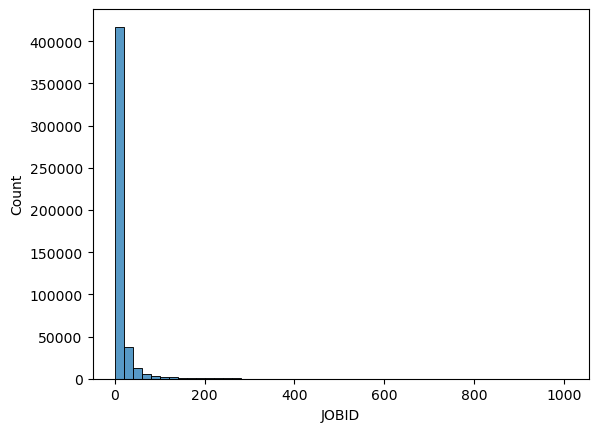

In [140]:
sns.histplot(data = typical_minute_count, x='JOBID', bins = 50)

## Looking At High and Low Failure Day With Full Detail

In [71]:
start_time_high_fail = pd.to_datetime('2020-12-04 10:00:00')
end_time_high_fail = pd.to_datetime('2020-12-04 10:59:59')

high_failure_timeframe_df = jobs_filtered[(jobs_filtered['END'] >= start_time_high_fail) & (jobs_filtered['END'] <= end_time_high_fail)].reset_index(drop=True)

In [72]:
high_failure_timeframe_df

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,25921757_49,COMPLETED,2020-12-02T02:34:57,2020-12-04 10:37:40,49152Mn,46.32,2-08:00:00,2-08:02:43,1,8,production,0:0
1,26086687,COMPLETED,2020-11-29T15:38:33,2020-12-04 10:24:49,1024Mc,124.64,5-10:00:00,4-18:46:16,1,1,production,0:0
2,26086770,COMPLETED,2020-11-29T17:00:33,2020-12-04 10:28:58,1024Mc,126.49,5-10:00:00,4-17:28:25,1,1,production,0:0
3,26149470_515,COMPLETED,2020-12-02T19:05:18,2020-12-04 10:09:26,8192Mn,8178.24,8-08:00:00,1-15:04:08,1,1,production,0:0
4,26149470_536,COMPLETED,2020-12-02T20:19:42,2020-12-04 10:39:31,8192Mn,8216.29,8-08:00:00,1-14:19:49,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
249,26269577,COMPLETED,2020-12-04T10:34:02,2020-12-04 10:44:34,32768Mn,2863.12,08:00:00,00:10:32,1,2,production,0:0
250,26269833,COMPLETED,2020-12-04T10:47:34,2020-12-04 10:49:19,81920Mn,794.62,2-00:00:00,00:01:45,1,4,production,0:0
251,26269863,COMPLETED,2020-12-04T10:52:54,2020-12-04 10:55:56,2000Mn,0.09,2-00:00:00,00:03:02,1,1,sam,0:0
252,26269864,COMPLETED,2020-12-04T10:55:57,2020-12-04 10:57:17,2000Mn,0.09,2-00:00:00,00:01:20,1,1,sam,0:0


In [73]:
high_failure_timeframe_df[high_failure_timeframe_df['PARTITION'] == 'production']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,25921757_49,COMPLETED,2020-12-02T02:34:57,2020-12-04 10:37:40,49152Mn,46.32,2-08:00:00,2-08:02:43,1,8,production,0:0
1,26086687,COMPLETED,2020-11-29T15:38:33,2020-12-04 10:24:49,1024Mc,124.64,5-10:00:00,4-18:46:16,1,1,production,0:0
2,26086770,COMPLETED,2020-11-29T17:00:33,2020-12-04 10:28:58,1024Mc,126.49,5-10:00:00,4-17:28:25,1,1,production,0:0
3,26149470_515,COMPLETED,2020-12-02T19:05:18,2020-12-04 10:09:26,8192Mn,8178.24,8-08:00:00,1-15:04:08,1,1,production,0:0
4,26149470_536,COMPLETED,2020-12-02T20:19:42,2020-12-04 10:39:31,8192Mn,8216.29,8-08:00:00,1-14:19:49,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,26269574,COMPLETED,2020-12-04T10:34:02,2020-12-04 10:44:50,32768Mn,3905.58,08:00:00,00:10:48,1,2,production,0:0
247,26269575,COMPLETED,2020-12-04T10:34:02,2020-12-04 10:45:12,32768Mn,3845.97,08:00:00,00:11:10,1,2,production,0:0
248,26269576,COMPLETED,2020-12-04T10:34:02,2020-12-04 10:44:26,32768Mn,2879.67,08:00:00,00:10:24,1,2,production,0:0
249,26269577,COMPLETED,2020-12-04T10:34:02,2020-12-04 10:44:34,32768Mn,2863.12,08:00:00,00:10:32,1,2,production,0:0


In [74]:
high_failure_timeframe_df['EXITCODE'].value_counts()

EXITCODE
0:0    254
Name: count, dtype: int64